# News20 Dataset Test DNN Classifier

This classifier tests classification of an embedding layer feeding into a convolution layer on the news20 data set.
The details of the data set and the performance of other classifiers is described here:
https://nlp.stanford.edu/wiki/Software/Classifier/20_Newsgroups

The aim of this classifier is to attempt to benchmark above 80% on the test set or better.
The news 20 data set has a large vocabulary and reasonably long utterances. 
On different domains with smaller restricted vocabularies I've found that the approach performs quite well, this is because of the limited size of the vocabulary.
Hence the news 20 dataset provides a good level of complexity to test against for the multi-class text classification problem on short passages of text.

This page provides a good exploration of the data set and a survey of a variety of different resources testing a variety of different classification algorithms against it.
https://acardocacho.github.io/capstone/

# Sourcing the Data.

This project makes use of the glove embeddings.
Download the glove embeddings from this link: 
- https://nlp.stanford.edu/data/glove.6B.zip

Create a directory data/glove/

And extract the contents below that directory this should provide the listing glove/glove.6N.50d.txt for example.


Obtain the news20 data set, this has been processed and generously made available here: http://ana.cachopo.org/datasets-for-single-label-text-categorization
Download the training set and test sets:
- http://ana.cachopo.org/datasets-for-single-label-text-categorization/20ng-train-all-terms.txt?attredirects=0
and
- http://ana.cachopo.org/datasets-for-single-label-text-categorization/20ng-test-all-terms.txt?attredirects=0

Place the text files in the path data/news20/ so the listing will be:

- data/news20/20ng-train-all-terms.txt
- data/news20/20ng-test-all-terms.txt



First steps prepare the data for use with the network.

In [1]:
import sys
import os
import numpy as np
import pickle

sys.path.insert(0, 'lib')

from lib import TextReader
from lib import GloveReader


basedir = 'data'


data_path = os.path.join(basedir, 'news20')
data_path = os.path.join(data_path, 'train_data_all.pickle')
vocab = []
all_words = []
all_classes = []
targets = None
sequences = None
reader = TextReader.TextReader(os.path.join(basedir, 'news20'), basedir)
    
if os.path.exists(data_path):
    with open(data_path, 'rb') as fin:
        all_data = pickle.load(fin)
        vocab = all_data['vocab']
        all_words = all_data['all_words']
        all_classes = all_data['all_classes']
        targets = all_data['targets']
        sequences = all_data['sequences']
else:
    vocab, all_words, all_classes = reader.read_labeled_documents('20ng-train-all-terms.txt')
    targets = reader.one_hot_encode_classes(all_classes)
    sequences = reader.make_index_sequences(vocab, all_words)
    all_data = {
        'vocab':vocab,
        'all_words':all_words,
        'all_classes': all_classes,
        'targets': targets,
        'sequences': sequences
    }
    with open(data_path, 'wb') as fout:
        pickle.dump(all_data, fout)





In [2]:
len(vocab)

73404

The vocabulary is quite reasonable for a realistic language problem. For short utterances constrained to a specific domain vocabs can be much smaller.
However these are short excerpts of text with a variety of different subjects.

In [3]:
sequences.head(3)

,0,1,2,3,4,5,6,7,8,9,...,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976
0,1,1,1,1,1,1,1,1,1,1,...,56323,28135,57319,4092,30915,38391,53721,39186,0,3
0,1,1,1,1,1,1,1,1,1,1,...,39186,31216,47898,57319,38391,47899,38741,66716,0,3
0,1,1,1,1,1,1,1,1,1,1,...,5337,38897,49969,70135,12616,52881,33507,5992,0,3


In [4]:
targets.head(3)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next we preload the glove embeddings and create an embedding matrix for our training vocabulary.

In [5]:

embed_reader = GloveReader.GloveReader(base_dir=basedir)
glove1 = embed_reader.read_glove_model('model50')


# save the vocab embeddings because they are expensive to recreate.
import pickle
output = os.path.join(basedir, 'news20')
output = os.path.join(output, 'vocab_embeddings.pickle')

vocab_embedding = None
if os.path.exists(output):
    with open(output, 'rb') as fin:
        vocab_embedding = pickle.load(fin)
else:
    vocab_embedding = reader.vocab_to_embedding_matrix(embed_reader, vocab)
    with open(output, 'wb') as fout:
        pickle.dump(vocab_embedding, fout)

Skipping line 18137: Expected 51 fields in line 18137, saw 52
Skipping line 77306: Expected 51 fields in line 77306, saw 52
Skipping line 78481: Expected 51 fields in line 78481, saw 52
Skipping line 80636: Expected 51 fields in line 80636, saw 52
Skipping line 86603: Expected 51 fields in line 86603, saw 52
Skipping line 95766: Expected 51 fields in line 95766, saw 52
Skipping line 97253: Expected 51 fields in line 97253, saw 52
Skipping line 98622: Expected 51 fields in line 98622, saw 52
Skipping line 102606: Expected 51 fields in line 102606, saw 52
Skipping line 104608: Expected 51 fields in line 104608, saw 52
Skipping line 120311: Expected 51 fields in line 120311, saw 52
Skipping line 123556: Expected 51 fields in line 123556, saw 52
Skipping line 129697: Expected 51 fields in line 129697, saw 52
Skipping line 140365: Expected 51 fields in line 140365, saw 52
Skipping line 141336: Expected 51 fields in line 141336, saw 52
Skipping line 147469: Expected 51 fields in line 147469,

# Stacked CNN Architecture

Now we can build the network and train it.
In this case the architecture is a stacked cnn on top of the embedding layers. 
The first layer uses a wide set of filters for convolving embeddings up to num_filters size ngrams then feeds these convolutions into a series of subsequent cnn layers.
There are maxpooling layers inbetween each convolution.
The last layer is an n-class softmax dense layer for categorical classification of newsgroup articles.

In [6]:
# the vocab embedding can be used with our cnn embedding model.
from lib import CnnClassifier

classifier = CnnClassifier.CnnClassifier()

max_sequence_length = sequences.shape[1]
embed_dim = vocab_embedding.shape[1]
num_outputs = targets.shape[1]
pool_size = 2
kernel_shape = 3
dropout_pc = 0.3
# note that filters correspond roughly with n-grams
num_filters=100
cnn_padding='same'


Using TensorFlow backend.


In [7]:
# Model without training the embedding layer, train_embedding=False
model = classifier.build_network(len(vocab), max_sequence_length, num_outputs, pool_size, kernel_shape, embed_dim, num_filters=num_filters, embedding_matrix=vocab_embedding, train_embedding=True, cnn_padding=cnn_padding)
model.summary()

model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 6977, 50)          3670200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6977, 100)         10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6977, 100)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2326, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2326, 100)         20100     
_________________________________________________________________
dropout_2 (Dropout)  

Prepare the training data.

In [8]:
np.random.seed(808)

rows = sequences.shape[0]
# will shuffle the data
indices = np.arange(rows)
np.random.shuffle(indices)

shuffled_inputs = sequences.values[indices]
shuffled_targets = targets.values[indices]
train_percent = 0.8
trainX, validateX = np.split(shuffled_inputs, [int(train_percent*shuffled_inputs.shape[0])])
trainY, validateY = np.split(shuffled_targets, [int(train_percent*shuffled_targets.shape[0])])


Train the model. Note prior to training run tensorboard from the base directory to monitor progress.

```
tensorboard --logdir logs
```

In [9]:
from datetime import datetime
import keras

logdir=os.path.join("logs", "scalars")
logdir=os.path.join(logdir, "model1")
logdir=os.path.join(logdir, datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

checkpoint_path = os.path.join("checkpoints", datetime.now().strftime("%Y%m%d-%H%M%S"))
os.mkdir(checkpoint_path)
checkpoint_path = os.path.join(checkpoint_path, "text_dnn_classifier-"+str(num_filters)+"-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5")

checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_categorical_accuracy', verbose=0, save_best_only=True, mode='max')

epochs=50



In [10]:

history = model.fit(trainX,
                    trainY,
                    epochs=epochs,
                    validation_data=(validateX, validateY),
                    callbacks=[tensorboard_callback, checkpoint_callback])

Instructions for updating:
Use tf.cast instead.
Train on 9034 samples, validate on 2259 samples
Epoch 1/50
9034/9034 [==============================] - 24s 3ms/step - loss: 2.5108 - categorical_accuracy: 0.3014 - val_loss: 1.5679 - val_categorical_accuracy: 0.4940
Epoch 2/50
9034/9034 [==============================] - 24s 3ms/step - loss: 1.3081 - categorical_accuracy: 0.5712 - val_loss: 1.2227 - val_categorical_accuracy: 0.6357
Epoch 3/50
9034/9034 [==============================] - 25s 3ms/step - loss: 0.8927 - categorical_accuracy: 0.7066 - val_loss: 1.0030 - val_categorical_accuracy: 0.6906
Epoch 4/50
9034/9034 [==============================] - 22s 2ms/step - loss: 0.7664 - categorical_accuracy: 0.7705 - val_loss: 0.8752 - val_categorical_accuracy: 0.7446
Epoch 5/50
9034/9034 [==============================] - 23s 3ms/step - loss: 0.5941 - categorical_accuracy: 0.8295 - val_loss: 0.7308 - val_categorical_accuracy: 0.7911
Epoch 6/50
9034/9034 [==============================] - 24s

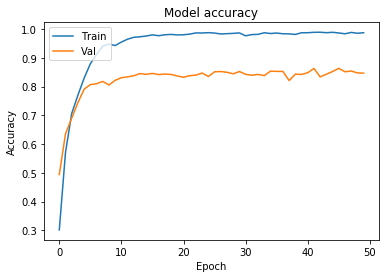

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


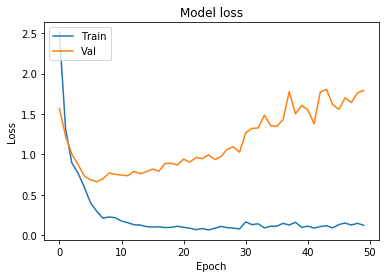

In [12]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


In [13]:
import pandas as pandas
# To evaluate the model we want the test reader to load the test set since it was in a separate file.
# but we want to use the original vocabulary to define the sequences.
test_reader = TextReader.TextReader(os.path.join(basedir, 'news20'),
                                    basedir)

testvocab = []
test_words = []
test_classes = []
test_targets = None
test_sequences = None

test_path = os.path.join(basedir, 'news20')
test_path = os.path.join(test_path, 'test_data.pickle')

if os.path.exists(test_path):
    with open(test_path, 'rb') as fin:
        all_data = pickle.load(fin)
        testvocab = all_data['test_vocab']
        test_words = all_data['test_words']
        test_classes = all_data['test_classes']
        test_targets = all_data['test_targets']
        test_sequences = all_data['test_sequences']
else:
    testvocab, test_words, test_classes = test_reader.read_labeled_documents('20ng-test-all-terms.txt')

    # get the test targets
    test_targets = test_reader.one_hot_encode_classes(test_classes)
    # get the test sequences but use the indexes in the vocabulary we trained on.
    # words in the test set not in the original vocab are substituted with '<UNKNOWN>'
    test_sequences = test_reader.make_index_sequences(vocab, test_words)
    # we need to set the max width of sequences to equal the maximum width of the
    # training data.
    test_width = test_sequences.shape[1]
    if test_width > max_sequence_length:
        delta = test_width - max_sequence_length
        test_sequences = test_sequences.iloc[:, delta:]
    elif test_width < max_sequence_length:
        # otherwise we need to pad the sequences so they are the same length.
        padding = vocab.index('<NA>')
        delta = max_sequence_length - test_width
        rows = test_sequences.shape[0]
        pad_cells = np.tile(padding, [rows, max_sequence_length])
        endcol = max_sequence_length -  1
        for i in range(0, rows):
            pad_cells[i,delta:max_sequence_length] = test_sequences.iloc[i,:]
        test_sequences = pandas.DataFrame(pad_cells)
        
    all_data = {
        'test_vocab': testvocab,
        'test_words': test_words,
        'test_classes': test_classes,
        'test_targets': test_targets,
        'test_sequences': test_sequences
    }
    with open(test_path, 'wb') as fout:
        pickle.dump(all_data, fout)
        
test_sequences.shape

(7528, 6977)

In [14]:
test_sequences.head(4)

,0,1,2,3,4,5,6,7,8,9,...,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976
0,1,1,1,1,1,1,1,1,1,1,...,62048,70067,16448,31963,44962,13338,15288,34014,0,3
1,1,1,1,1,1,1,1,1,1,1,...,68051,36886,25999,39955,2045,7938,34145,18131,0,3
2,1,1,1,1,1,1,1,1,1,1,...,69973,64717,66057,52587,41767,29107,529,39186,0,3
3,1,1,1,1,1,1,1,1,1,1,...,58569,52587,35099,36296,353,18015,63022,35099,0,3


In [15]:
test_targets.head(4)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
loss, accuracy = model.evaluate(test_sequences, test_targets)

7528/7528 [==============================] - 4s 529us/step


In [17]:
loss, accuracy

(3.050381520723706, 0.7541179596174282)

In [18]:
from keras import backend as b
b.clear_session()

# Wide CNN Architecture 

The Wide CNN Architecture consists of 3 parallel input, embedding, cnn, maxpooling and flatten layers. These are merged prior to the softmax dense output layer.
The 3 parrallel CNN layers are configured with different number of ngrams each that are then fed through the maxpooling and flatten layers and merged prior to the dense output.
The wide architecture is based on the paper "Convolutional Neural Networks for Sentence Classification" by Yoon Kim, 2014 (https://arxiv.org/abs/1408.5882).
Note that aside from differing configurations of ngrams in the parallel layers, it is possible to use other feature embeddings in parallel, such as entity embeddings, or part of speech embeddings. Hence this architecture serves as a good starting point for experimenting with these other types of features.

In [19]:
from lib import WideCnnClassifier

classifier2 = WideCnnClassifier.WideCnnClassifier()

max_sequence_length = sequences.shape[1]
embed_dim = vocab_embedding.shape[1]
num_outputs = targets.shape[1]
pool_size = 2
kernel_shape = 3
dropout_pc = 0.3
# note that filters correspond roughly with n-grams
num_filters=[3, 5, 7]
cnn_padding='same'

In [20]:
# Model without training the embedding layer, train_embedding=False
model2 = classifier2.build_network(len(vocab), max_sequence_length, num_outputs, pool_size, kernel_shape, embed_dim, ngram_widths=num_filters, embedding_matrix=vocab_embedding, train_embedding=True, cnn_padding=cnn_padding)
model2.summary()

model2.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6977)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6977)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6977)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 6977, 50)     3670200     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_

In [21]:
from datetime import datetime
import keras

logdir=os.path.join("logs", "scalars")
logdir=os.path.join(logdir, "model1")
logdir=os.path.join(logdir, datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

checkpoint_path = os.path.join("checkpoints", datetime.now().strftime("%Y%m%d-%H%M%S"))
os.mkdir(checkpoint_path)
checkpoint_path = os.path.join(checkpoint_path, "wide_text_dnn_classifier-"+str(num_filters)+"-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5")

checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_categorical_accuracy', verbose=0, save_best_only=True, mode='max')

epochs=50

In [22]:
# This model takes the input data replicated 3 times for the three different sizes of ngrams.
history2 = model2.fit([trainX, trainX, trainX],
                    trainY,
                    epochs=epochs,
                    validation_data=([validateX, validateX, validateX], validateY),
                    callbacks=[tensorboard_callback, checkpoint_callback])

Train on 9034 samples, validate on 2259 samples
Epoch 1/50
9034/9034 [==============================] - 21s 2ms/step - loss: 2.5199 - categorical_accuracy: 0.3654 - val_loss: 1.5074 - val_categorical_accuracy: 0.5365
Epoch 2/50
9034/9034 [==============================] - 20s 2ms/step - loss: 3.3810 - categorical_accuracy: 0.6212 - val_loss: 15.5948 - val_categorical_accuracy: 0.0323
Epoch 3/50
9034/9034 [==============================] - 21s 2ms/step - loss: 1.1755 - categorical_accuracy: 0.8271 - val_loss: 0.9840 - val_categorical_accuracy: 0.7317
Epoch 4/50
9034/9034 [==============================] - 21s 2ms/step - loss: 0.2940 - categorical_accuracy: 0.9431 - val_loss: 1.0039 - val_categorical_accuracy: 0.7499
Epoch 5/50
9034/9034 [==============================] - 20s 2ms/step - loss: 0.2310 - categorical_accuracy: 0.9660 - val_loss: 0.8801 - val_categorical_accuracy: 0.7663
Epoch 6/50
9034/9034 [==============================] - 20s 2ms/step - loss: 0.1464 - categorical_accuracy

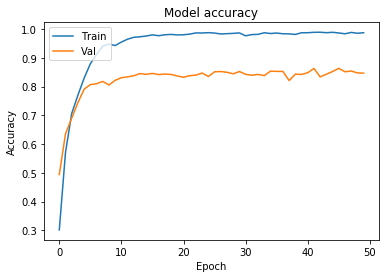

In [23]:
import matplotlib.pyplot as plt

plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

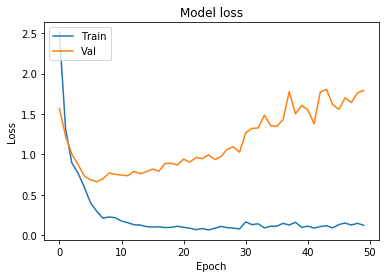

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

In [25]:
loss2, accuracy2 = model2.evaluate([test_sequences, test_sequences, test_sequences], test_targets)

7528/7528 [==============================] - 4s 479us/step


In [26]:
loss2, accuracy2

(2.2319813323673356, 0.7051009564293305)

In [27]:
from keras import backend as b
b.clear_session()

In [28]:
from lib import StackedWideCnnClassifier

classifier3 = StackedWideCnnClassifier.StackedWideCnnClassifier()

max_sequence_length = sequences.shape[1]
embed_dim = vocab_embedding.shape[1]
num_outputs = targets.shape[1]
pool_size = 2
kernel_shape = 3
dropout_pc = 0.3
# note that filters correspond roughly with n-grams
num_filters=[3, 5, 7]
end_filters = 21
cnn_padding='same'

In [29]:
# Model without training the embedding layer, train_embedding=False
model3 = classifier3.build_network(len(vocab), max_sequence_length, num_outputs, pool_size, kernel_shape, embed_dim, ngram_widths=num_filters, end_filters=end_filters, embedding_matrix=vocab_embedding, train_embedding=True, cnn_padding=cnn_padding)
model3.summary()

model3.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6977)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6977)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6977)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 6977, 50)     3670200     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_

In [30]:
from datetime import datetime
import keras

logdir=os.path.join("logs", "scalars")
logdir=os.path.join(logdir, "model1")
logdir=os.path.join(logdir, datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

checkpoint_path = os.path.join("checkpoints", datetime.now().strftime("%Y%m%d-%H%M%S"))
os.mkdir(checkpoint_path)
checkpoint_path = os.path.join(checkpoint_path, "stacked_wide_text_dnn_classifier-"+str(num_filters)+"-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5")

checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_categorical_accuracy', verbose=0, save_best_only=True, mode='max')

epochs=50

In [31]:
# This model takes the input data replicated 3 times for the three different sizes of ngrams.
history3 = model3.fit([trainX, trainX, trainX],
                    trainY,
                    epochs=epochs,
                    validation_data=([validateX, validateX, validateX], validateY),
                    callbacks=[tensorboard_callback, checkpoint_callback])

Train on 9034 samples, validate on 2259 samples
Epoch 1/50
9034/9034 [==============================] - 22s 2ms/step - loss: 2.7347 - categorical_accuracy: 0.1414 - val_loss: 2.3487 - val_categorical_accuracy: 0.2479
Epoch 2/50
9034/9034 [==============================] - 22s 2ms/step - loss: 1.9448 - categorical_accuracy: 0.3083 - val_loss: 1.8849 - val_categorical_accuracy: 0.3940
Epoch 3/50
9034/9034 [==============================] - 22s 2ms/step - loss: 1.4884 - categorical_accuracy: 0.4520 - val_loss: 1.5369 - val_categorical_accuracy: 0.5308
Epoch 4/50
9034/9034 [==============================] - 25s 3ms/step - loss: 1.1464 - categorical_accuracy: 0.5787 - val_loss: 1.2512 - val_categorical_accuracy: 0.6166
Epoch 5/50
9034/9034 [==============================] - 26s 3ms/step - loss: 0.9367 - categorical_accuracy: 0.6705 - val_loss: 1.0856 - val_categorical_accuracy: 0.6799
Epoch 6/50
9034/9034 [==============================] - 26s 3ms/step - loss: 0.7340 - categorical_accuracy:

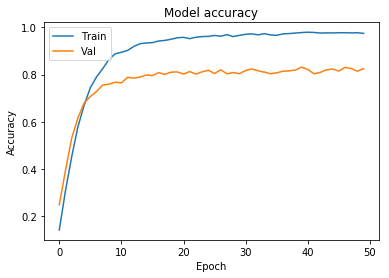

In [34]:
import matplotlib.pyplot as plt

plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

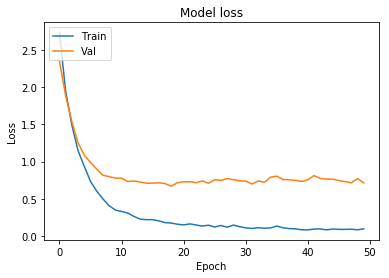

In [35]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

In [32]:
loss3, accuracy3 = model3.evaluate([test_sequences, test_sequences, test_sequences], test_targets)

7528/7528 [==============================] - 3s 452us/step


In [33]:
loss3, accuracy3

(1.316622585849985, 0.7155951115834219)